# Import Libraries and Datasets

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.metrics import confusion_matrix

# Import Datasets
df_cleaned_v2 = pd.read_csv('../data/processed/data_cleaned_v2.csv')
df_cleaned_v3 = pd.read_csv('../data/processed/data_cleaned_v3.csv')
df_cleaned_v4 = pd.read_csv('../data/processed/data_cleaned_v4.csv')
df_cleaned_v5 = pd.read_csv('../data/processed/data_cleaned_v5.csv')
df_train_v6 = pd.read_csv('../data/processed/df_train_v6.csv')
df_test_v6 = pd.read_csv('../data/processed/df_test_v6.csv')

In [54]:
print(df_cleaned_v2.shape)
print(df_cleaned_v3.shape)
print(df_cleaned_v4.shape)
print(df_cleaned_v5.shape)

(15420, 139)
(15420, 116)
(15420, 116)
(15420, 87)


# Create Function

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate the accuracy, precision, recall, and F1 score
def get_test_metrics(y_test, y_pred, y_prob):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'AUC: {auc:.4f}')

    # Calculate and print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label') 
    plt.show()

# Modeling (df_cleaned_v2)

## Stratified Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

X = df_cleaned_v2.drop(columns = ['FraudFound_P'])
y = df_cleaned_v2['FraudFound_P']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

## Modeling

### Modeling with balanced class weights

Accuracy: 0.9410
Precision: 1.0000
Recall: 0.0162
F1 Score: 0.0319
AUC: 0.8246


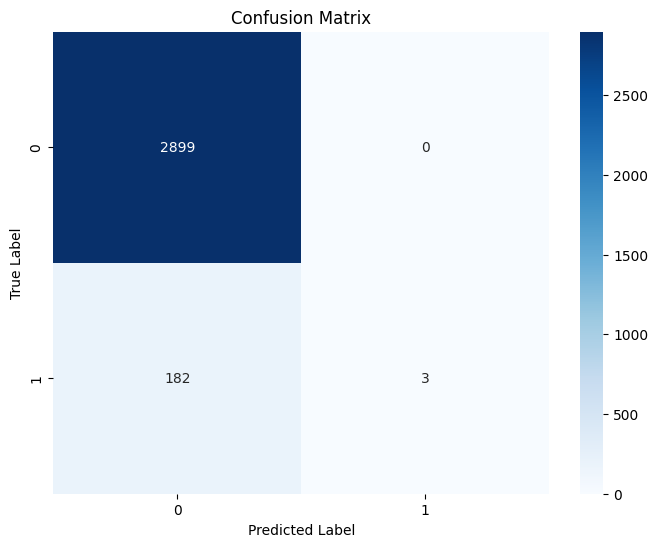

In [28]:
# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train a Random Forest model
baseline_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
baseline_model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = baseline_model.predict(X_test)
y_prob = baseline_model.predict_proba(X_test)[:, 1]

get_test_metrics(y_test, y_pred, y_prob)

### Modeling with SMOTE

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Accuracy: 0.9384
Precision: 0.3529
Recall: 0.0324
F1 Score: 0.0594
AUC: 0.8260


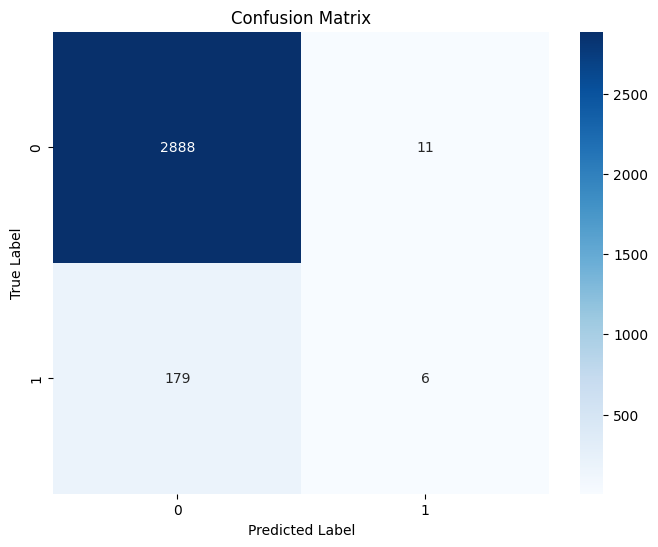

In [30]:
# Train a Random Forest model
model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# Evaluate the model on the testing set
y_pred = model_smote.predict(X_test)
y_prob = model_smote.predict_proba(X_test)[:, 1]

get_test_metrics(y_test, y_pred, y_prob)

### Imbalanced library models

Accuracy: 0.5931
Precision: 0.1243
Recall: 0.9568
F1 Score: 0.2200
AUC: 1.0000


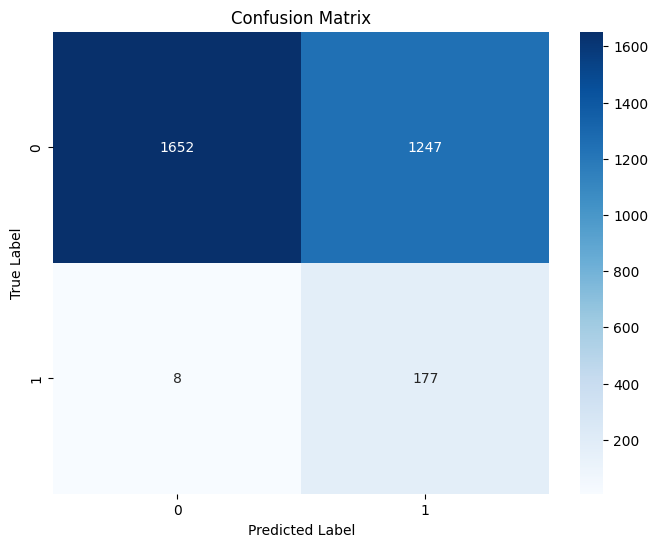

In [31]:
#train easyensemble classifier
from imblearn.ensemble import EasyEnsembleClassifier

ee = EasyEnsembleClassifier(n_estimators=100, random_state=42)
ee.fit(X_train, y_train)
y_pred = ee.predict(X_test)
y_prob = ee.predict_proba(X_test)[:, 1]

get_test_metrics(y_test, y_pred, y_test)

# Modeling (df_cleaned_v3)

## Stratified Train Test Split

In [32]:
X = df_cleaned_v3.drop(columns = ['FraudFound_P'])
y = df_cleaned_v3['FraudFound_P']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

## Modeling with SMOTE

In [33]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Accuracy: 0.9368
Precision: 0.3684
Recall: 0.0757
F1 Score: 0.1256
AUC: 0.8125


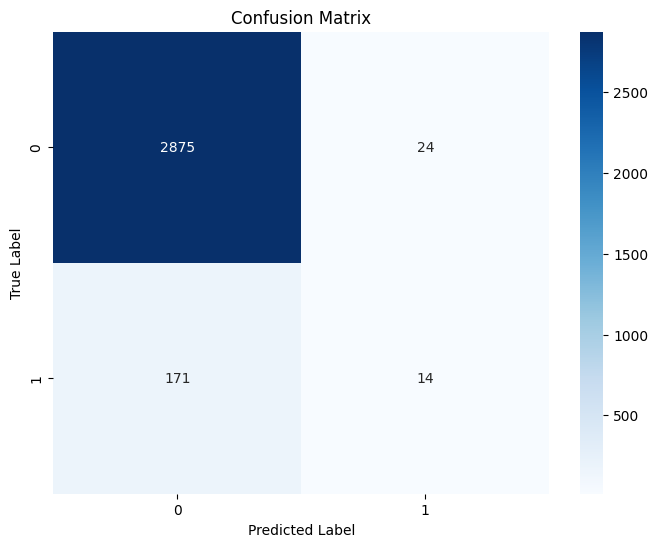

In [34]:
# Train a Random Forest 
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

y_pred = rf_smote.predict(X_test)
y_prob = rf_smote.predict_proba(X_test)[:, 1]

get_test_metrics(y_test, y_pred, y_prob)

## Modeling with Undersampling

In [36]:
from imblearn.under_sampling import RandomUnderSampler

# Use RandomUnderSampler for undersampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [39]:
y_train_rus.value_counts()

FraudFound_P
0    738
1    738
Name: count, dtype: int64

Accuracy: 0.6534
Precision: 0.1353
Recall: 0.8865
F1 Score: 0.2348
AUC: 0.8193


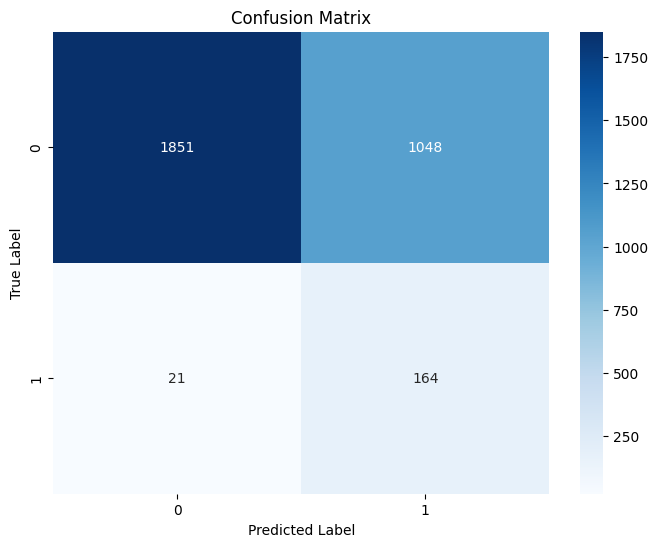

In [37]:
# Train a Random Forest 
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_rus, y_train_rus)

y_pred = rf_smote.predict(X_test)
y_prob = rf_smote.predict_proba(X_test)[:, 1]

get_test_metrics(y_test, y_pred, y_prob)

## Imbalanced library models

Accuracy: 0.5934
Precision: 0.1244
Recall: 0.9568
F1 Score: 0.2201
AUC: 1.0000


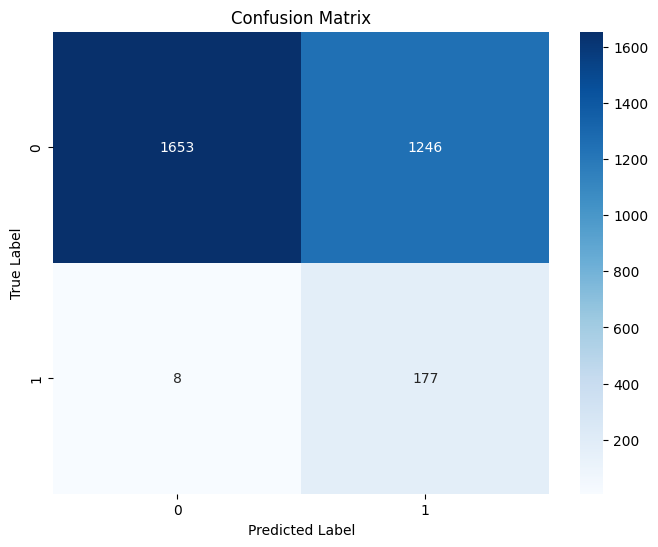

In [35]:
# Train an EasyEnsembleClassifier
ee = EasyEnsembleClassifier(n_estimators=100, random_state=42)
ee.fit(X_train, y_train)
y_pred = ee.predict(X_test)
y_prob = ee.predict_proba(X_test)[:, 1]

get_test_metrics(y_test, y_pred, y_test)

Accuracy: 0.6978
Precision: 0.1473
Recall: 0.8432
F1 Score: 0.2508
AUC: 0.8216


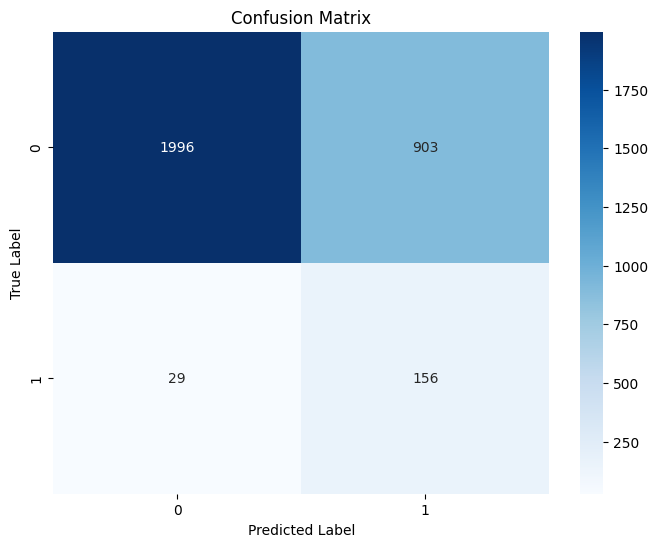

In [46]:
# Train a Balanced Bagging Classifier
from imblearn.ensemble import BalancedBaggingClassifier

forest = RandomForestClassifier(random_state = 42, criterion = 'entropy', n_jobs = -1)
balbag = BalancedBaggingClassifier(estimator = forest, n_estimators=100, bootstrap = True,
                                   bootstrap_features = True, sampling_strategy = 'majority', replacement = True,
                                   n_jobs = -1, random_state = 42)

balbag.fit(X_train, y_train)
y_pred = balbag.predict(X_test)
y_prob = balbag.predict_proba(X_test)[:, 1]

get_test_metrics(y_test, y_pred, y_prob)

# Modeling (df_cleaned_v4)

## Stratified Train Test Split

In [49]:
X = df_cleaned_v4.drop(columns = ['FraudFound_P'])
y = df_cleaned_v4['FraudFound_P']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

## Modeling

Accuracy: 0.6965
Precision: 0.1454
Recall: 0.8324
F1 Score: 0.2476
AUC: 0.8226


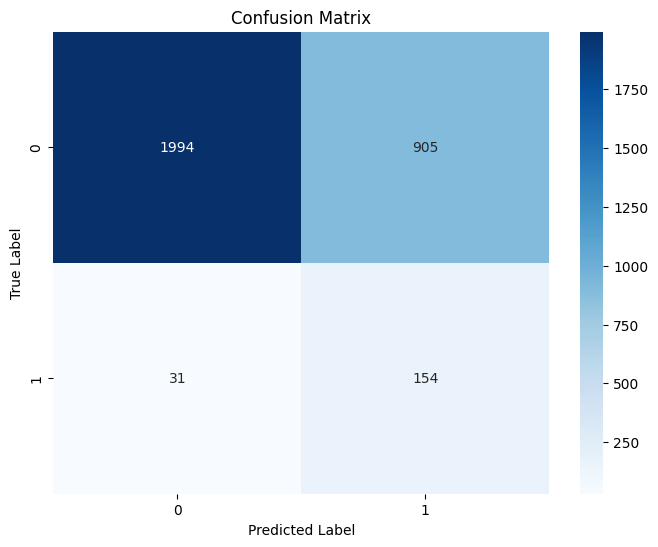

In [50]:
# Train a Balanced Bagging Classifier (base model: Random Forest)
from imblearn.ensemble import BalancedBaggingClassifier

forest = RandomForestClassifier(random_state = 42, criterion = 'entropy', n_jobs = -1)
balbag = BalancedBaggingClassifier(estimator = forest, n_estimators=100, bootstrap = True,
                                   bootstrap_features = True, sampling_strategy = 'majority', replacement = True,
                                   n_jobs = -1, random_state = 42)

balbag.fit(X_train, y_train)
y_pred = balbag.predict(X_test)
y_prob = balbag.predict_proba(X_test)[:, 1]

get_test_metrics(y_test, y_pred, y_prob)

Accuracy: 0.7033
Precision: 0.1490
Recall: 0.8378
F1 Score: 0.2531
AUC: 0.8261


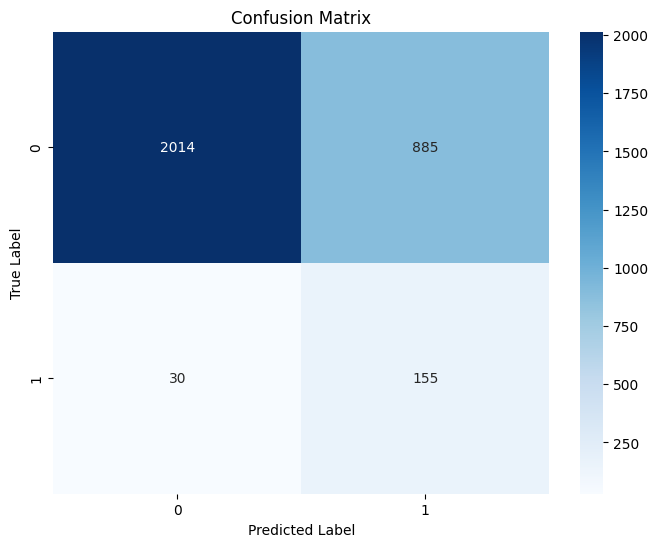

In [51]:
# Train a Balanced Bagging Classifier (base model: LGBM)
import lightgbm as lgb
from imblearn.ensemble import BalancedBaggingClassifier

lgbm = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1)
balbag = BalancedBaggingClassifier(estimator = lgbm, n_estimators=100, bootstrap = True,
                                   bootstrap_features = True, sampling_strategy = 'majority', replacement = True,
                                   n_jobs = -1, random_state = 42)

balbag.fit(X_train, y_train)
y_pred = balbag.predict(X_test)
y_prob = balbag.predict_proba(X_test)[:, 1]

get_test_metrics(y_test, y_pred, y_prob)

# Modeling (df_cleaned_v5)

## Stratified Train Test Split

In [130]:
X = df_cleaned_v5.drop(columns = ['FraudFound_P'])
y = df_cleaned_v5['FraudFound_P']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

## Modeling 

Accuracy: 0.7043
Precision: 0.1508
Recall: 0.8486
F1 Score: 0.2561
AUC: 0.8250


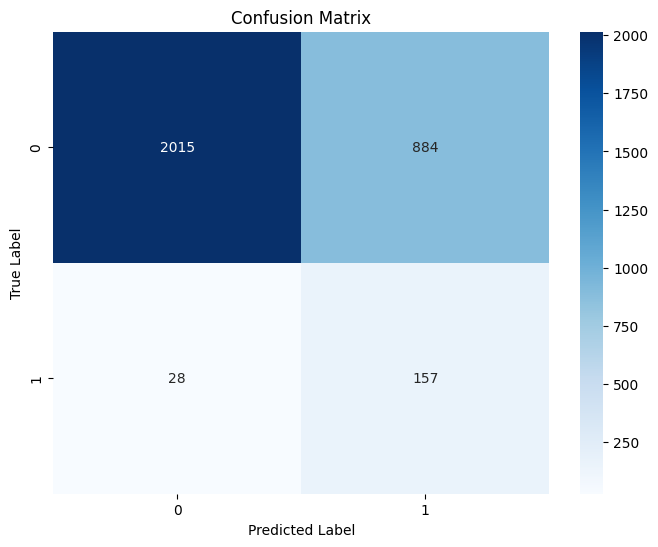

In [131]:
# Train a Balanced Bagging Classifier (base model: LGBM)
import lightgbm as lgb
from imblearn.ensemble import BalancedBaggingClassifier

lgbm = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1)
balbag = BalancedBaggingClassifier(estimator = lgbm, n_estimators=100, bootstrap = True,
                                   bootstrap_features = True, sampling_strategy = 'majority', replacement = True,
                                   n_jobs = -1, random_state = 42)

balbag.fit(X_train, y_train)
y_pred = balbag.predict(X_test)
y_prob = balbag.predict_proba(X_test)[:, 1]

get_test_metrics(y_test, y_pred, y_prob)

## Use RFECV to select feature with LGBM

In [111]:
# Use Undersampling first
rus = RandomUnderSampler(random_state = 42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

Accuracy: 0.9309
Precision: 0.2941
Recall: 0.1081
F1 Score: 0.1581
AUC: 0.8265


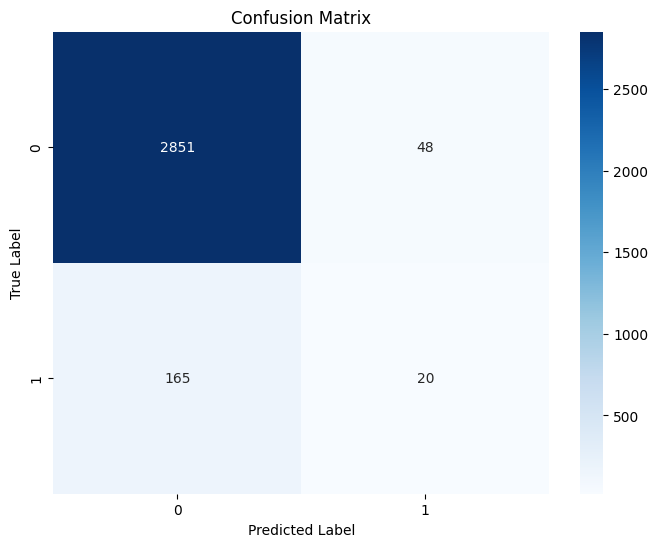

In [112]:
lgbm = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1)
lgbm.fit(X_train_rus, y_train_rus)
y_pred = lgbm.predict(X_test)
y_prob = lgbm.predict_proba(X_test)[:, 1]

get_test_metrics(y_test, y_pred, y_prob)

In [113]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1)
rfecv = RFECV(estimator = lgbm, step = 1, cv = StratifiedKFold(5), scoring = 'f1')
rfecv.fit(X_train_rus, y_train_rus)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LGBMClassifier(random_state=42, verbose=-1), scoring='f1')

In [114]:
print("Optimal number of features:", rfecv.n_features_)
print("Selected features:", rfecv.support_)
print("Feature ranking:", rfecv.ranking_)

Optimal number of features: 74
Selected features: [ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False False  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True False  True  True
  True  True False  True False  True False  True  True  True  True  True]
Feature ranking: [ 1  1  1  1  1  1  5  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  7  6  4  1  8  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  1 10  1  1
  1  1 11  1  9  1  2  1  1  1  1  1]


In [115]:
X_train_rus_selected = rfecv.transform(X_train_rus)
X_test_selected = rfecv.transform(X_test)
X_train_rus_selected.shape

(23196, 74)

Accuracy: 0.9309
Precision: 0.3108
Recall: 0.1243
F1 Score: 0.1776
AUC: 0.8277


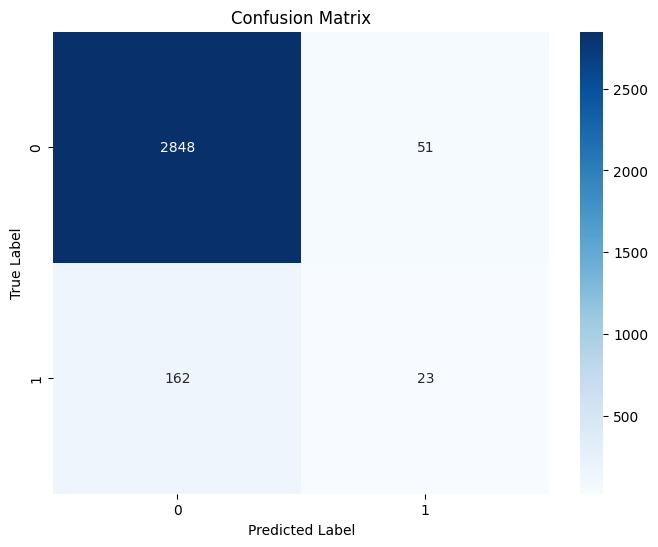

In [116]:
lgbm = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1)
lgbm.fit(X_train_rus_selected, y_train_rus)
y_pred = lgbm.predict(X_test_selected)
y_prob = lgbm.predict_proba(X_test_selected)[:, 1]

get_test_metrics(y_test, y_pred, y_prob)

Accuracy: 0.9322
Precision: 0.3125
Recall: 0.1081
F1 Score: 0.1606
AUC: 0.7985


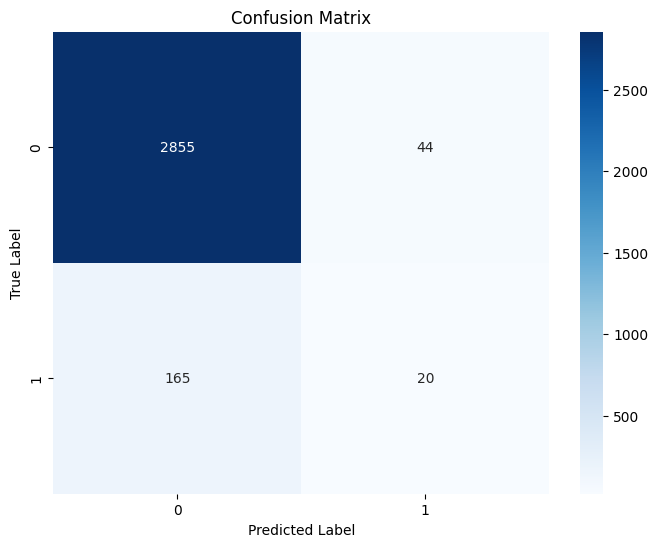

In [117]:
# Train a Balanced Bagging Classifier
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test) 

lgbm = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1)
balbag = BalancedBaggingClassifier(estimator = lgbm, n_estimators=100, bootstrap = True,
                                   bootstrap_features = True, sampling_strategy = 'majority', replacement = True,
                                   n_jobs = -1, random_state = 42)

balbag.fit(X_train_selected, y_train)
y_pred = balbag.predict(X_test_selected)
y_prob = balbag.predict_proba(X_test_selected)[:, 1]

get_test_metrics(y_test, y_pred, y_prob)

Accuracy: 0.7866
Precision: 0.1276
Recall: 0.4378
F1 Score: 0.1976
AUC: 0.7567


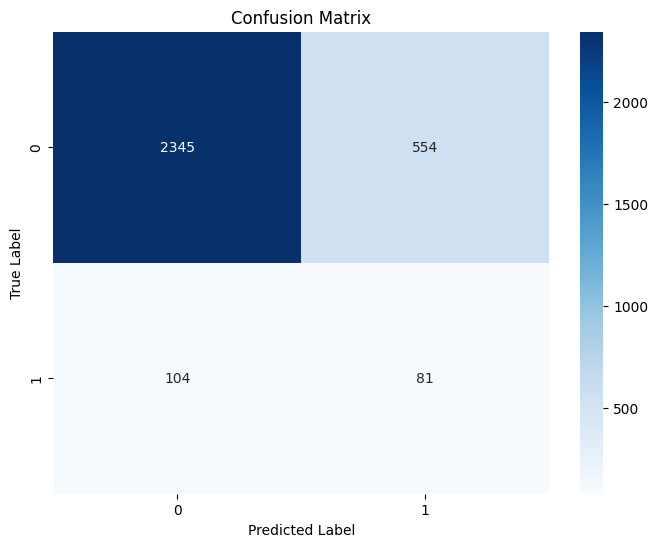

In [119]:
# Train an EasyEnesmble Classifier
ee = EasyEnsembleClassifier(n_estimators=100, random_state = 42)
ee.fit(X_train_selected, y_train)
y_pred = ee.predict(X_test_selected)
y_prob = ee.predict_proba(X_test_selected)[:, 1]

get_test_metrics(y_test, y_pred, y_prob)

# Modeling (df_cleaned_v6)

In [101]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb

X_train = df_train_v6.drop(columns = 'FraudFound_P')
y_train = df_train_v6['FraudFound_P']
X_test = df_test_v6.drop(columns = 'FraudFound_P')
y_test = df_test_v6['FraudFound_P']

lgbm = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1)
rfecv = RFECV(estimator = lgbm, step = 1, cv = StratifiedKFold(5), scoring = 'f1')
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LGBMClassifier(random_state=42, verbose=-1), scoring='f1')

In [102]:
print("Optimal number of features:", rfecv.n_features_)

Optimal number of features: 67
Selected features: [ True False  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True False False False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True False False False
 False False False  True False  True False  True  True  True  True  True]
Feature ranking: [ 1  7  1  1  1  1 12  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  8  1  1  1 14 13 11  3 15  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 10  1  1  1  1  1 17  2  6
  5  4 18  1 16  1  9  1  1  1  1  1]


In [103]:
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

Accuracy: 0.9348
Precision: 0.3824
Recall: 0.1405
F1 Score: 0.2055
AUC: 0.8266


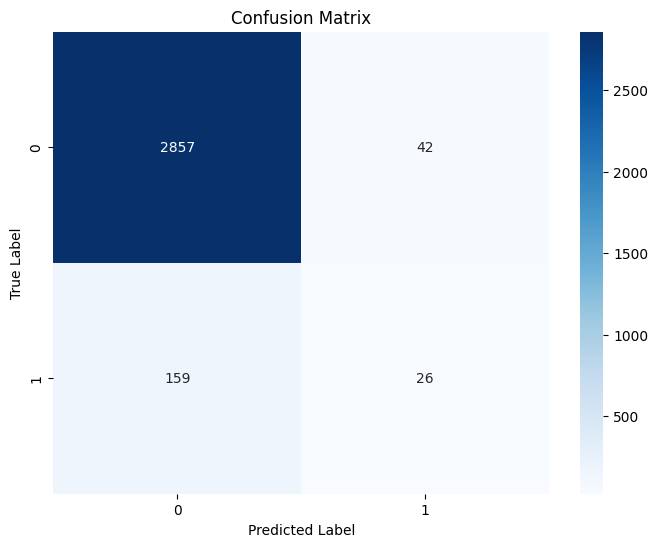

In [104]:
lgbm = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1)
lgbm.fit(X_train_selected, y_train)
y_pred = lgbm.predict(X_test_selected)
y_prob = lgbm.predict_proba(X_test_selected)[:, 1]

get_test_metrics(y_test, y_pred, y_prob)

# Anomaly Detection (df_cleaned_v5)

In [83]:
y_train.value_counts(normalize = True)

FraudFound_P
0    0.940175
1    0.059825
Name: proportion, dtype: float64

In [85]:
from sklearn.ensemble import IsolationForest

# Initialize and fit Isolation Forest
iso_forest = IsolationForest(random_state=42, contamination=0.5)
iso_forest.fit(X_train)

# Get anomaly predictions (-1 for anomalies, 1 for normal)
y_pred_train = iso_forest.predict(X_train)
y_pred_test = iso_forest.predict(X_test)

# Convert predictions to binary (1 for anomalies, 0 for normal)
y_pred_train_binary = [1 if x == -1 else 0 for x in y_pred_train]
y_pred_test_binary = [1 if x == -1 else 0 for x in y_pred_test]

Accuracy: 0.5023
Precision: 0.0594
Recall: 0.4919
F1 Score: 0.1060


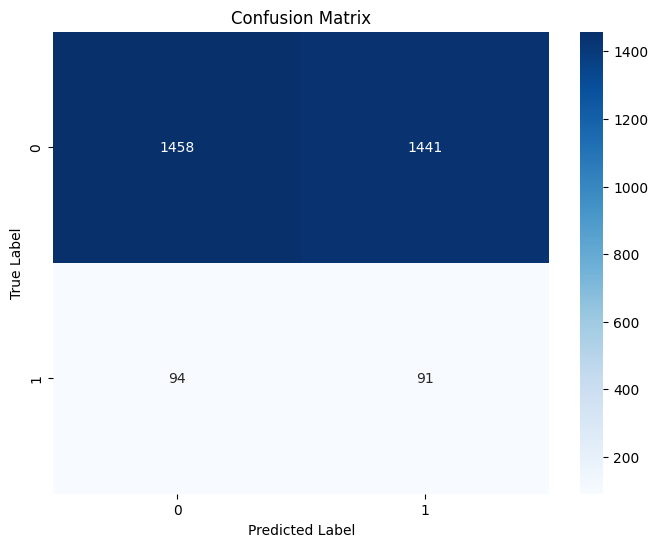

In [86]:
accuracy = accuracy_score(y_test, y_pred_test_binary)
precision = precision_score(y_test, y_pred_test_binary)
recall = recall_score(y_test, y_pred_test_binary)
f1 = f1_score(y_test, y_pred_test_binary)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred_test_binary)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label') 
plt.show()

In [139]:
from sklearn.model_selection import train_test_split

df_train, df_valid = train_test_split(df_cleaned_v5, test_size=0.3, random_state=42, stratify=df_cleaned_v5['FraudFound_P'])
df_valid, df_test = train_test_split(df_valid, test_size=0.5, random_state=42, stratify=df_valid['FraudFound_P'])

In [140]:
# 將訓練集分成正常樣本（多數類別）和異常樣本（少數類別）
df_train_normal = df_train[df_train['FraudFound_P'] == 0]
df_train_anomaly = df_train[df_train['FraudFound_P'] == 1]

# 分離特徵跟目標變數（非監督學習訓練時只用到正常樣本的特徵)
X_train_normal = df_train_normal.drop(columns = 'FraudFound_P')
y_trai_normal = df_train_normal['FraudFound_P']

X_valid = df_valid.drop(columns = 'FraudFound_P')
y_valid= df_valid['FraudFound_P']

X_test = df_test.drop(columns = 'FraudFound_P')
y_test= df_test['FraudFound_P']

In [141]:
# 計算異常樣本的比例
df_train['FraudFound_P'].value_counts(normalize = True)

FraudFound_P
0    0.940152
1    0.059848
Name: proportion, dtype: float64

In [155]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.06, random_state=42)  

# 訓練模型（僅使用正常樣本）
iso_forest.fit(X_train_normal)

IsolationForest(contamination=0.06, random_state=42)

In [156]:
# 在驗證集上預測異常分數
y_valid_scores = iso_forest.decision_function(X_valid)  # 產生異常分數
y_valid_pred = iso_forest.predict(X_valid)

# 將預測結果轉為 0 和 1
# Isolation Forest 預測結果中，1 表示正常樣本，-1 表示異常樣本
y_valid_pred = [1 if x == -1 else 0 for x in y_valid_pred]  # 將 -1 轉為 1，表示異常

# 調整閾值（可以嘗試不同的閾值來優化指標，例如F1或AUC分數）
from sklearn.metrics import f1_score

# 計算驗證集上的 F1 和 AUC 分數
f1 = f1_score(y_valid, y_valid_pred)
print(f"Validation F1 Score: {f1}")

Validation F1 Score: 0.08609271523178808


In [157]:
# 計算第 5 個分位數的閾值
threshold = np.percentile(y_valid_scores, 6)  # 5% 的分位數作為異常閾值
print(f"Selected anomaly threshold: {threshold}")

# 標記異常樣本
y_valid_pred = (y_valid_scores < threshold).astype(int)

Selected anomaly threshold: -0.003082487402918546


# Modeling (df_cleaned_v5) adjust threshold with validation dataset

In [167]:
from sklearn.model_selection import train_test_split

df_train, df_valid = train_test_split(df_cleaned_v5, test_size=0.3, random_state=42, stratify=df_cleaned_v5['FraudFound_P'])
df_valid, df_test = train_test_split(df_valid, test_size=0.5, random_state=42, stratify=df_valid['FraudFound_P'])

X_train = df_train.drop(columns = ['FraudFound_P'])
y_train = df_train['FraudFound_P']
X_valid = df_valid.drop(columns = ['FraudFound_P'])
y_valid = df_valid['FraudFound_P']
X_test = df_test.drop(columns = ['FraudFound_P'])
y_test = df_test['FraudFound_P']

Accuracy: 0.7086
Precision: 0.1476
Recall: 0.8058
F1 Score: 0.2494
AUC: 0.8304


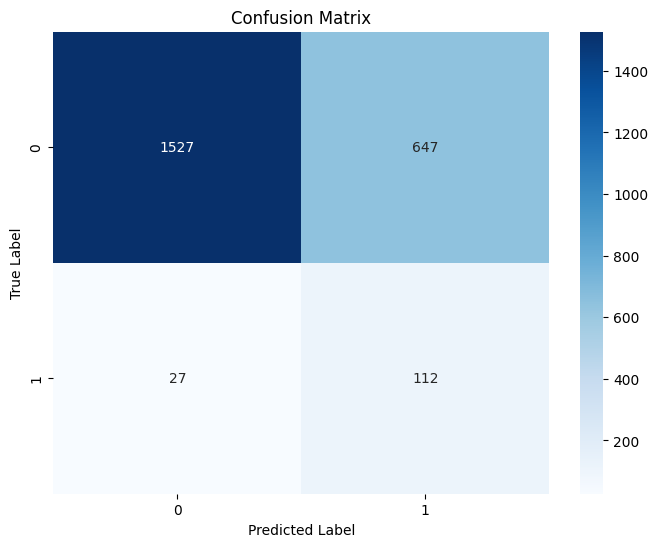

In [168]:
# Train a Balanced Bagging Classifier (base model: LGBM)
import lightgbm as lgb
from imblearn.ensemble import BalancedBaggingClassifier

lgbm = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1)
balbag = BalancedBaggingClassifier(estimator = lgbm, n_estimators=100, bootstrap = True,
                                   bootstrap_features = True, sampling_strategy = 'majority', replacement = True,
                                   n_jobs = -1, random_state = 42)

balbag.fit(X_train, y_train)
y_pred_valid = balbag.predict(X_valid)
y_prob_valid = balbag.predict_proba(X_valid)[:, 1]

get_test_metrics(y_valid, y_pred_valid, y_prob_valid)

In [170]:
# 設定閾值範圍
thresholds = np.linspace(0.1, 0.9, 50)

best_threshold = 0.5  # 初始閾值
best_f1 = 0

for threshold in thresholds:
    y_pred_adjusted = (y_prob_valid >= threshold).astype(int)
    precision = precision_score(y_valid, y_pred_adjusted)
    recall = recall_score(y_valid, y_pred_adjusted)
    f1 = f1_score(y_valid, y_pred_adjusted)
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    # 更新最佳閾值
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"\nBest Threshold: {best_threshold:.2f}, Best F1-score: {best_f1:.4f}")


Threshold: 0.10, Precision: 0.0768, Recall: 0.9856, F1-score: 0.1426
Threshold: 0.12, Precision: 0.0801, Recall: 0.9856, F1-score: 0.1481
Threshold: 0.13, Precision: 0.0846, Recall: 0.9856, F1-score: 0.1558
Threshold: 0.15, Precision: 0.0887, Recall: 0.9856, F1-score: 0.1628
Threshold: 0.17, Precision: 0.0931, Recall: 0.9856, F1-score: 0.1701
Threshold: 0.18, Precision: 0.0979, Recall: 0.9856, F1-score: 0.1782
Threshold: 0.20, Precision: 0.1036, Recall: 0.9856, F1-score: 0.1875
Threshold: 0.21, Precision: 0.1101, Recall: 0.9856, F1-score: 0.1981
Threshold: 0.23, Precision: 0.1152, Recall: 0.9784, F1-score: 0.2061
Threshold: 0.25, Precision: 0.1188, Recall: 0.9784, F1-score: 0.2118
Threshold: 0.26, Precision: 0.1224, Recall: 0.9784, F1-score: 0.2176
Threshold: 0.28, Precision: 0.1250, Recall: 0.9784, F1-score: 0.2217
Threshold: 0.30, Precision: 0.1262, Recall: 0.9784, F1-score: 0.2235
Threshold: 0.31, Precision: 0.1275, Recall: 0.9784, F1-score: 0.2255
Threshold: 0.33, Precision: 0.1270

Accuracy: 0.8305
Precision: 0.1793
Recall: 0.5145
F1 Score: 0.2659
AUC: 0.8123


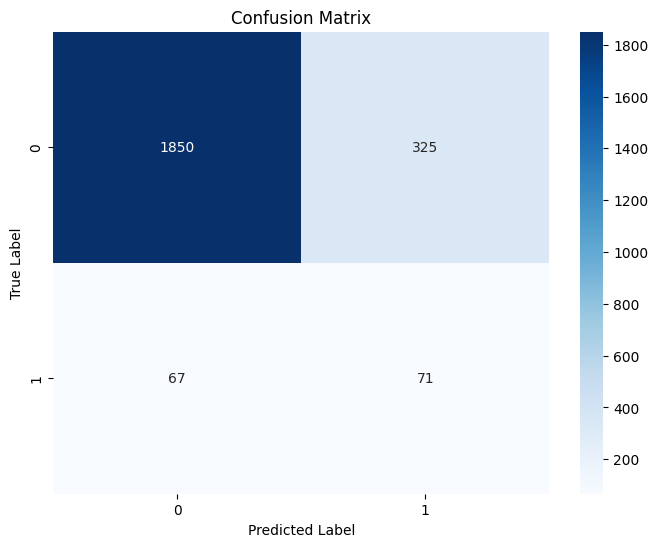

In [171]:
# 將train data與validation data合併，重新訓練模型
df_train_final = pd.concat([df_train, df_valid], ignore_index=True)
X_train_final = df_train_final.drop(columns=['FraudFound_P'])
y_train_final = df_train_final['FraudFound_P']
lgbm = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1)
balbag = BalancedBaggingClassifier(estimator = lgbm, n_estimators=100, bootstrap = True,
                                   bootstrap_features = True, sampling_strategy = 'majority', replacement = True,
                                   n_jobs = -1, random_state = 42)
balbag.fit(X_train_final, y_train_final)


y_prob_test = balbag.predict_proba(X_test)[:, 1]
y_pred_test = (y_prob_test >= best_threshold).astype(int)

get_test_metrics(y_test, y_pred_test, y_prob_test)